In [2]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import scipy.io as sio


%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8

In [3]:
df =  pd.read_csv("data_2/sensor.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [4]:
rows_with_zero_or_nan = df.applymap(lambda x: pd.isna(x) ).any(axis=1)  # adding this not changing anything 'or x == 0'
count = rows_with_zero_or_nan.sum()
print(f"Number of rows with at least one 0 or NaN value: {count}")

/tmp/ipykernel_13517/2342891805.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_zero_or_nan = df.applymap(lambda x: pd.isna(x) ).any(axis=1)  # adding this not changing anything 'or x == 0'


Number of rows with at least one 0 or NaN value: 220320


In [5]:
print(df.isnull().sum())

timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
sensor_38             27


In [6]:
sensors_to_drop = ['sensor_15', 'sensor_50']
df = df.drop(columns=sensors_to_drop)
sensor_cols = df.columns[df.isnull().any()].tolist()
print("Columns with at least one NaN value:")
print(sensor_cols)
# Linear interpolation
df[sensor_cols] = df[sensor_cols].interpolate(method='linear')
# If any remaining NaNs, use forward/backward fill
df[sensor_cols] = df[sensor_cols].fillna(method='ffill')
df[sensor_cols] = df[sensor_cols].fillna(method='bfill')
# Verify no missing values remain
print(df[sensor_cols].isnull().sum())

Columns with at least one NaN value:
['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_51']


/tmp/ipykernel_13517/3572442030.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[sensor_cols] = df[sensor_cols].fillna(method='ffill')
/tmp/ipykernel_13517/3572442030.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[sensor_cols] = df[sensor_cols].fillna(method='bfill')


sensor_00    0
sensor_01    0
sensor_02    0
sensor_03    0
sensor_04    0
sensor_05    0
sensor_06    0
sensor_07    0
sensor_08    0
sensor_09    0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
sensor_22    0
sensor_23    0
sensor_24    0
sensor_25    0
sensor_26    0
sensor_27    0
sensor_28    0
sensor_29    0
sensor_30    0
sensor_31    0
sensor_32    0
sensor_33    0
sensor_34    0
sensor_35    0
sensor_36    0
sensor_37    0
sensor_38    0
sensor_39    0
sensor_40    0
sensor_41    0
sensor_42    0
sensor_43    0
sensor_44    0
sensor_45    0
sensor_46    0
sensor_47    0
sensor_48    0
sensor_49    0
sensor_51    0
dtype: int64


In [7]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Encode machine_status if necessary
df['machine_status'] = df['machine_status'].map({'NORMAL': 0, 'BROKEN': 1, 'RECOVERING': 2})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 52 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       220320 non-null  datetime64[ns]
 1   sensor_00       220320 non-null  float64       
 2   sensor_01       220320 non-null  float64       
 3   sensor_02       220320 non-null  float64       
 4   sensor_03       220320 non-null  float64       
 5   sensor_04       220320 non-null  float64       
 6   sensor_05       220320 non-null  float64       
 7   sensor_06       220320 non-null  float64       
 8   sensor_07       220320 non-null  float64       
 9   sensor_08       220320 non-null  float64       
 10  sensor_09       220320 non-null  float64       
 11  sensor_10       220320 non-null  float64       
 12  sensor_11       220320 non-null  float64       
 13  sensor_12       220320 non-null  float64       
 14  sensor_13       220320 non-null  flo

In [8]:
# Select sensor columns
sensor_cols = [col for col in df.columns if 'sensor_' in col]

# Scale sensor data using StandardScaler
scaler = MinMaxScaler()
df[sensor_cols] = scaler.fit_transform(df[sensor_cols])

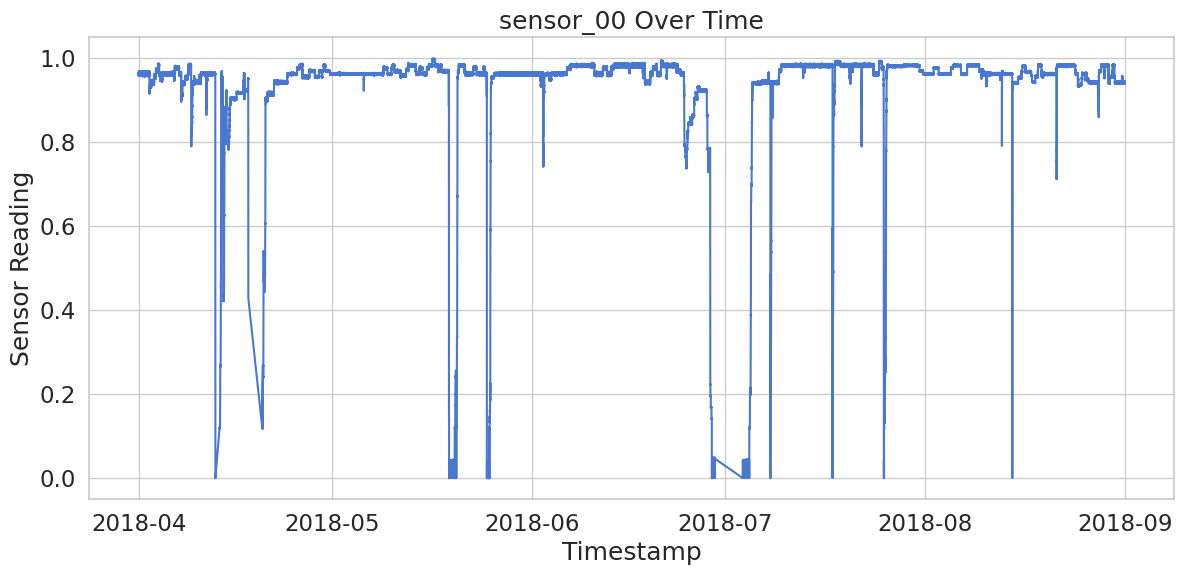

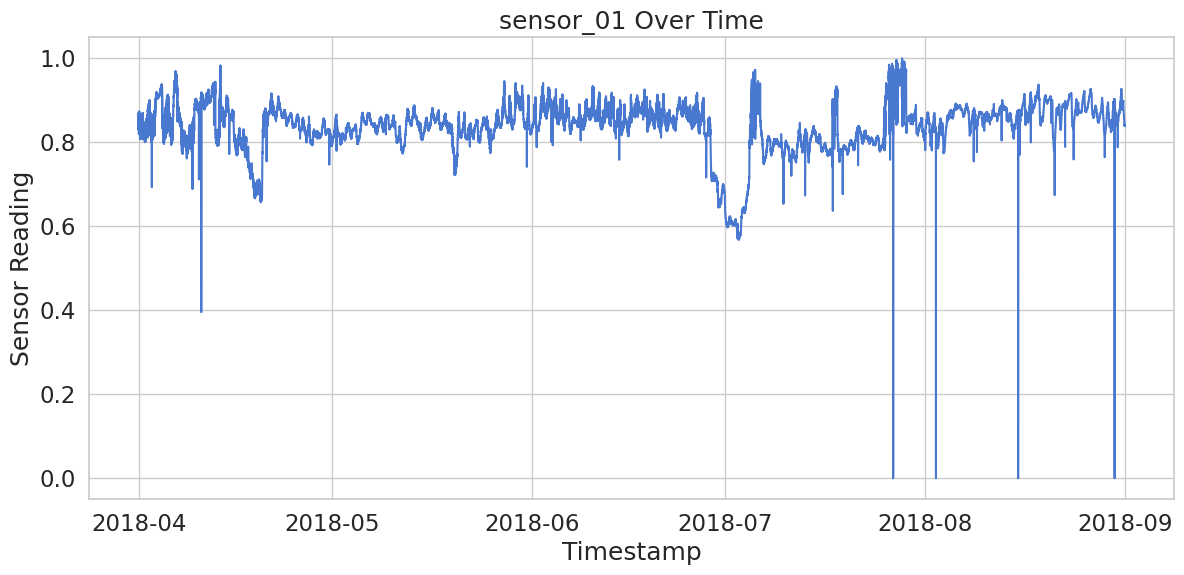

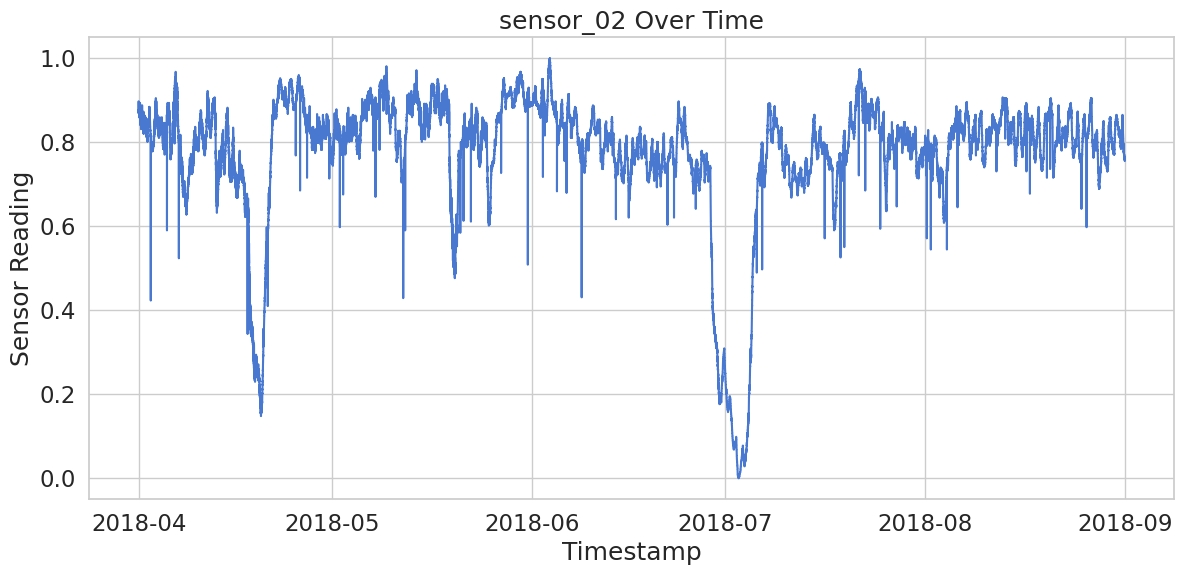

In [9]:
# Plot sensor readings over time for a few sensors
for col in sensor_cols[:3]:
    plt.figure(figsize=(14, 6))
    plt.plot(df['timestamp'], df[col])
    plt.title(f'{col} Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Reading')
    plt.show()

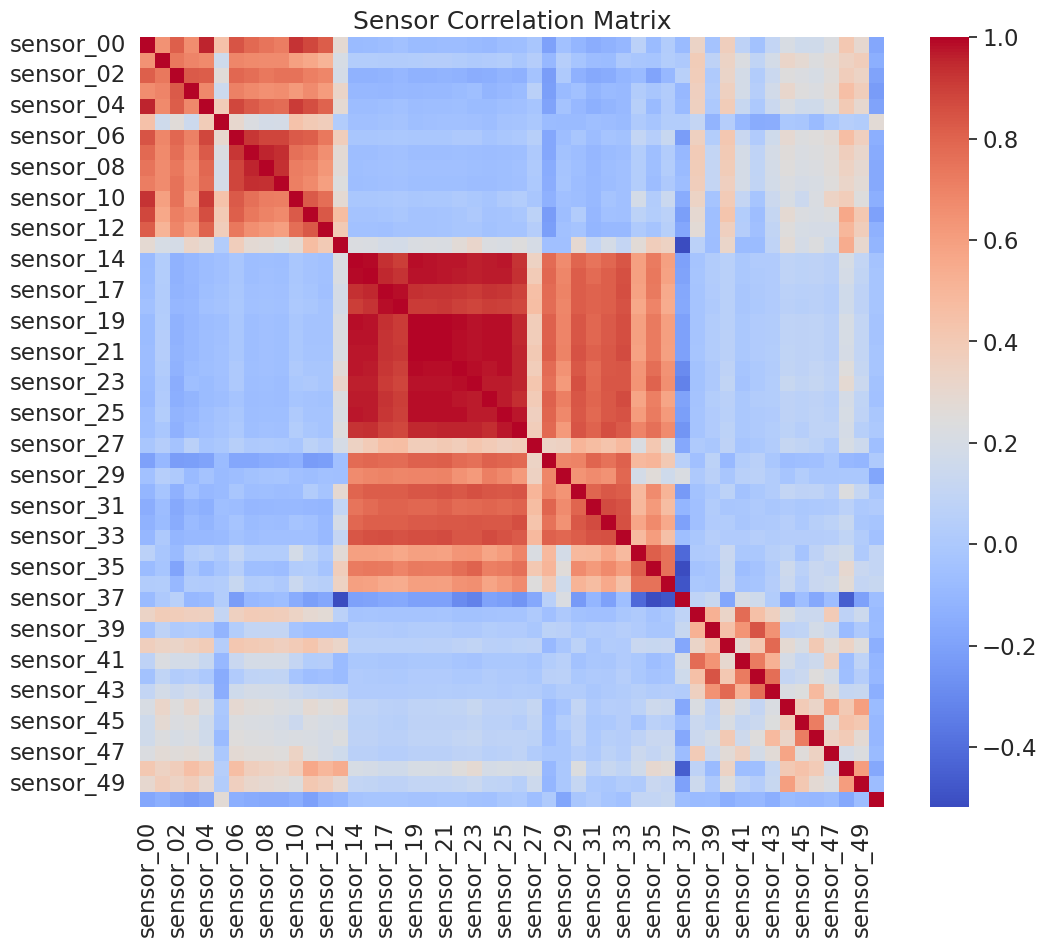

In [10]:
# Compute correlation matrix
corr_matrix = df[sensor_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Sensor Correlation Matrix')
plt.show()

In [ ]:
normal = df[(df['machine_status'] == 0) | (df['machine_status'] == 2)].sample(9000)
attack = df[df['machine_status'] == 1]
df1 = pd.concat([normal, attack]).sample(frac=1).reset_index(drop=True)
X = df1.drop(['machine_status', 'timestamp'], axis = 1)#.values
Y = df1["machine_status"] #.values
# 🔹 Calcola la Mutual Information
mi_scores = mutual_info_classif(X, Y)

# 🔹 Crea un DataFrame con i risultati
mi_results = pd.DataFrame({"Feature": X.columns, "MI_Score": mi_scores})

# 🔹 Filtra solo le feature con MI > 0 (cioè, che portano informazione)
threshold = 0
selected_features = mi_results[mi_results["MI_Score"] > threshold]

# 🔹 Ordina in base all'importanza
selected_features = selected_features.sort_values(by="MI_Score", ascending=False)

# 🔹 Stampa le feature selezionate
print("Feature più informative rispetto alle anomalie:")
print(selected_features)

# 🔹 Se vuoi solo i nomi delle feature per usarle in MATLAB
important_feature_names = selected_features["Feature"].tolist()
print("\nFeature selezionate:", important_feature_names)

Feature più informative rispetto alle anomalie:
      Feature  MI_Score
4   sensor_04  0.238381
10  sensor_10  0.232565
0   sensor_00  0.232531
11  sensor_11  0.230351
5   sensor_05  0.228719
12  sensor_12  0.227519
6   sensor_06  0.225608
13  sensor_13  0.217669
8   sensor_08  0.207582
47  sensor_48  0.204120
7   sensor_07  0.201491
9   sensor_09  0.195129
48  sensor_49  0.192117
39  sensor_40  0.189064
1   sensor_01  0.186026
37  sensor_38  0.185738
2   sensor_02  0.185701
38  sensor_39  0.164653
49  sensor_51  0.161955
45  sensor_46  0.161468
3   sensor_03  0.156292
44  sensor_45  0.152180
46  sensor_47  0.150178
43  sensor_44  0.150167
40  sensor_41  0.147065
42  sensor_43  0.132010
41  sensor_42  0.127397
25  sensor_26  0.123038
27  sensor_28  0.094850
24  sensor_25  0.090352
35  sensor_36  0.078200
28  sensor_29  0.046842
31  sensor_32  0.043431
22  sensor_23  0.043194
14  sensor_14  0.039507
33  sensor_34  0.037171
30  sensor_31  0.034309
21  sensor_22  0.034032
29  sensor_30  0

In [12]:
# Supponiamo che `df` sia il tuo DataFrame originale
selected_features = ['sensor_04', 'sensor_00']

# Creiamo un nuovo DataFrame con solo queste feature + il target
df_selected = df[selected_features + ["machine_status"]]

# Salviamo il file CSV
df_selected.to_csv("./data_2/relevant_features_PUMP.csv", index=False)

In [25]:
df = pd.read_csv("./data_2/relevant_features_PUMP.csv")
df["machine_status"] = df["machine_status"].map({1: 1, 0: 0, 2:0})
X_train = df[df['machine_status'] == 0].drop(columns=['machine_status']).sample(n=10000, random_state=42)
y_train = df[df['machine_status'] == 0]['machine_status'].iloc[X_train.index]

# Filtra solo le anomalie per il test set
X_test = df[df['machine_status'] == 1].drop(columns=['machine_status'])
y_test = df[df['machine_status'] == 1]['machine_status']

# Aggiungi tutti i dati normali al test set
normal_data_sample = df[df['machine_status'] == 0].drop(columns=['machine_status']).sample(n=2993, random_state=42)
X_test = pd.concat([X_test, normal_data_sample])

# Aggiungi le etichette corrispondenti a questi dati normali
y_test = pd.concat([y_test, df[df['machine_status'] == 0].iloc[normal_data_sample.index]['machine_status']])


X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

# Stampa le dimensioni dei dataset
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("Numero di etichette 0 in y_test:", np.sum(y_test == 0))
print("Numero di etichette 1 in y_test:", np.sum(y_test == 1))



X_train shape: (8000, 2)
y_train shape: (8000,)
X_val shape: (2000, 2)
y_val shape: (2000,)
X_test shape: (3000, 2)
y_test shape: (3000,)
Numero di etichette 0 in y_test: 2993
Numero di etichette 1 in y_test: 7


In [27]:
# 🔹 Salva i dataset in formato MATLAB (.mat)
sio.savemat("./data_2/fuzzy_data_PUMP.mat", {
    "X_train": np.array(X_train), 
    "y_train": np.array(y_train).astype(float).reshape(-1, 1),  # Mantieni etichette in colonna
    "X_val": np.array(X_val), 
    "y_val": np.array(y_val).astype(float).reshape(-1, 1),
    "X_test_5perc": np.array(X_test), 
    "y_test_5perc": np.array(y_test).astype(float).reshape(-1, 1)
})

print("Dataset PUMP preparato e salvato in formato MATLAB!")

Dataset PUMP preparato e salvato in formato MATLAB!
